In [2]:
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

#mpl.rcParams['figure.dpi'] = 500

In [14]:
"""
    An initial condition x0
    An rmin and an rmax that specify a range of r values for the x-axis of your bifurcation plot
    An rstep, which specifies how many "slices" your plot has
    A number n of total iterates to perform
    A number k of total iterates to discard without plotting (i.e., to remove the transient)
"""
def bifurcation_diagram(iterator=logistic_iterator, x0=0.2, r_min=2.4, r_max=4.0, r_step=0.0001, n=1000, k=500):
    fig, ax = plt.subplots(1,1,figsize=(12,8), dpi=500)
    rs = np.arange(r_min, r_max, r_step)
    for r in rs: 
        xs = iterate_map(x0,r,n, iterator=iterator)
        xs = xs[k:]  #remove first k samples
        ax.plot([r]*len(xs), xs, ',k', alpha=0.5)
    plt.show()

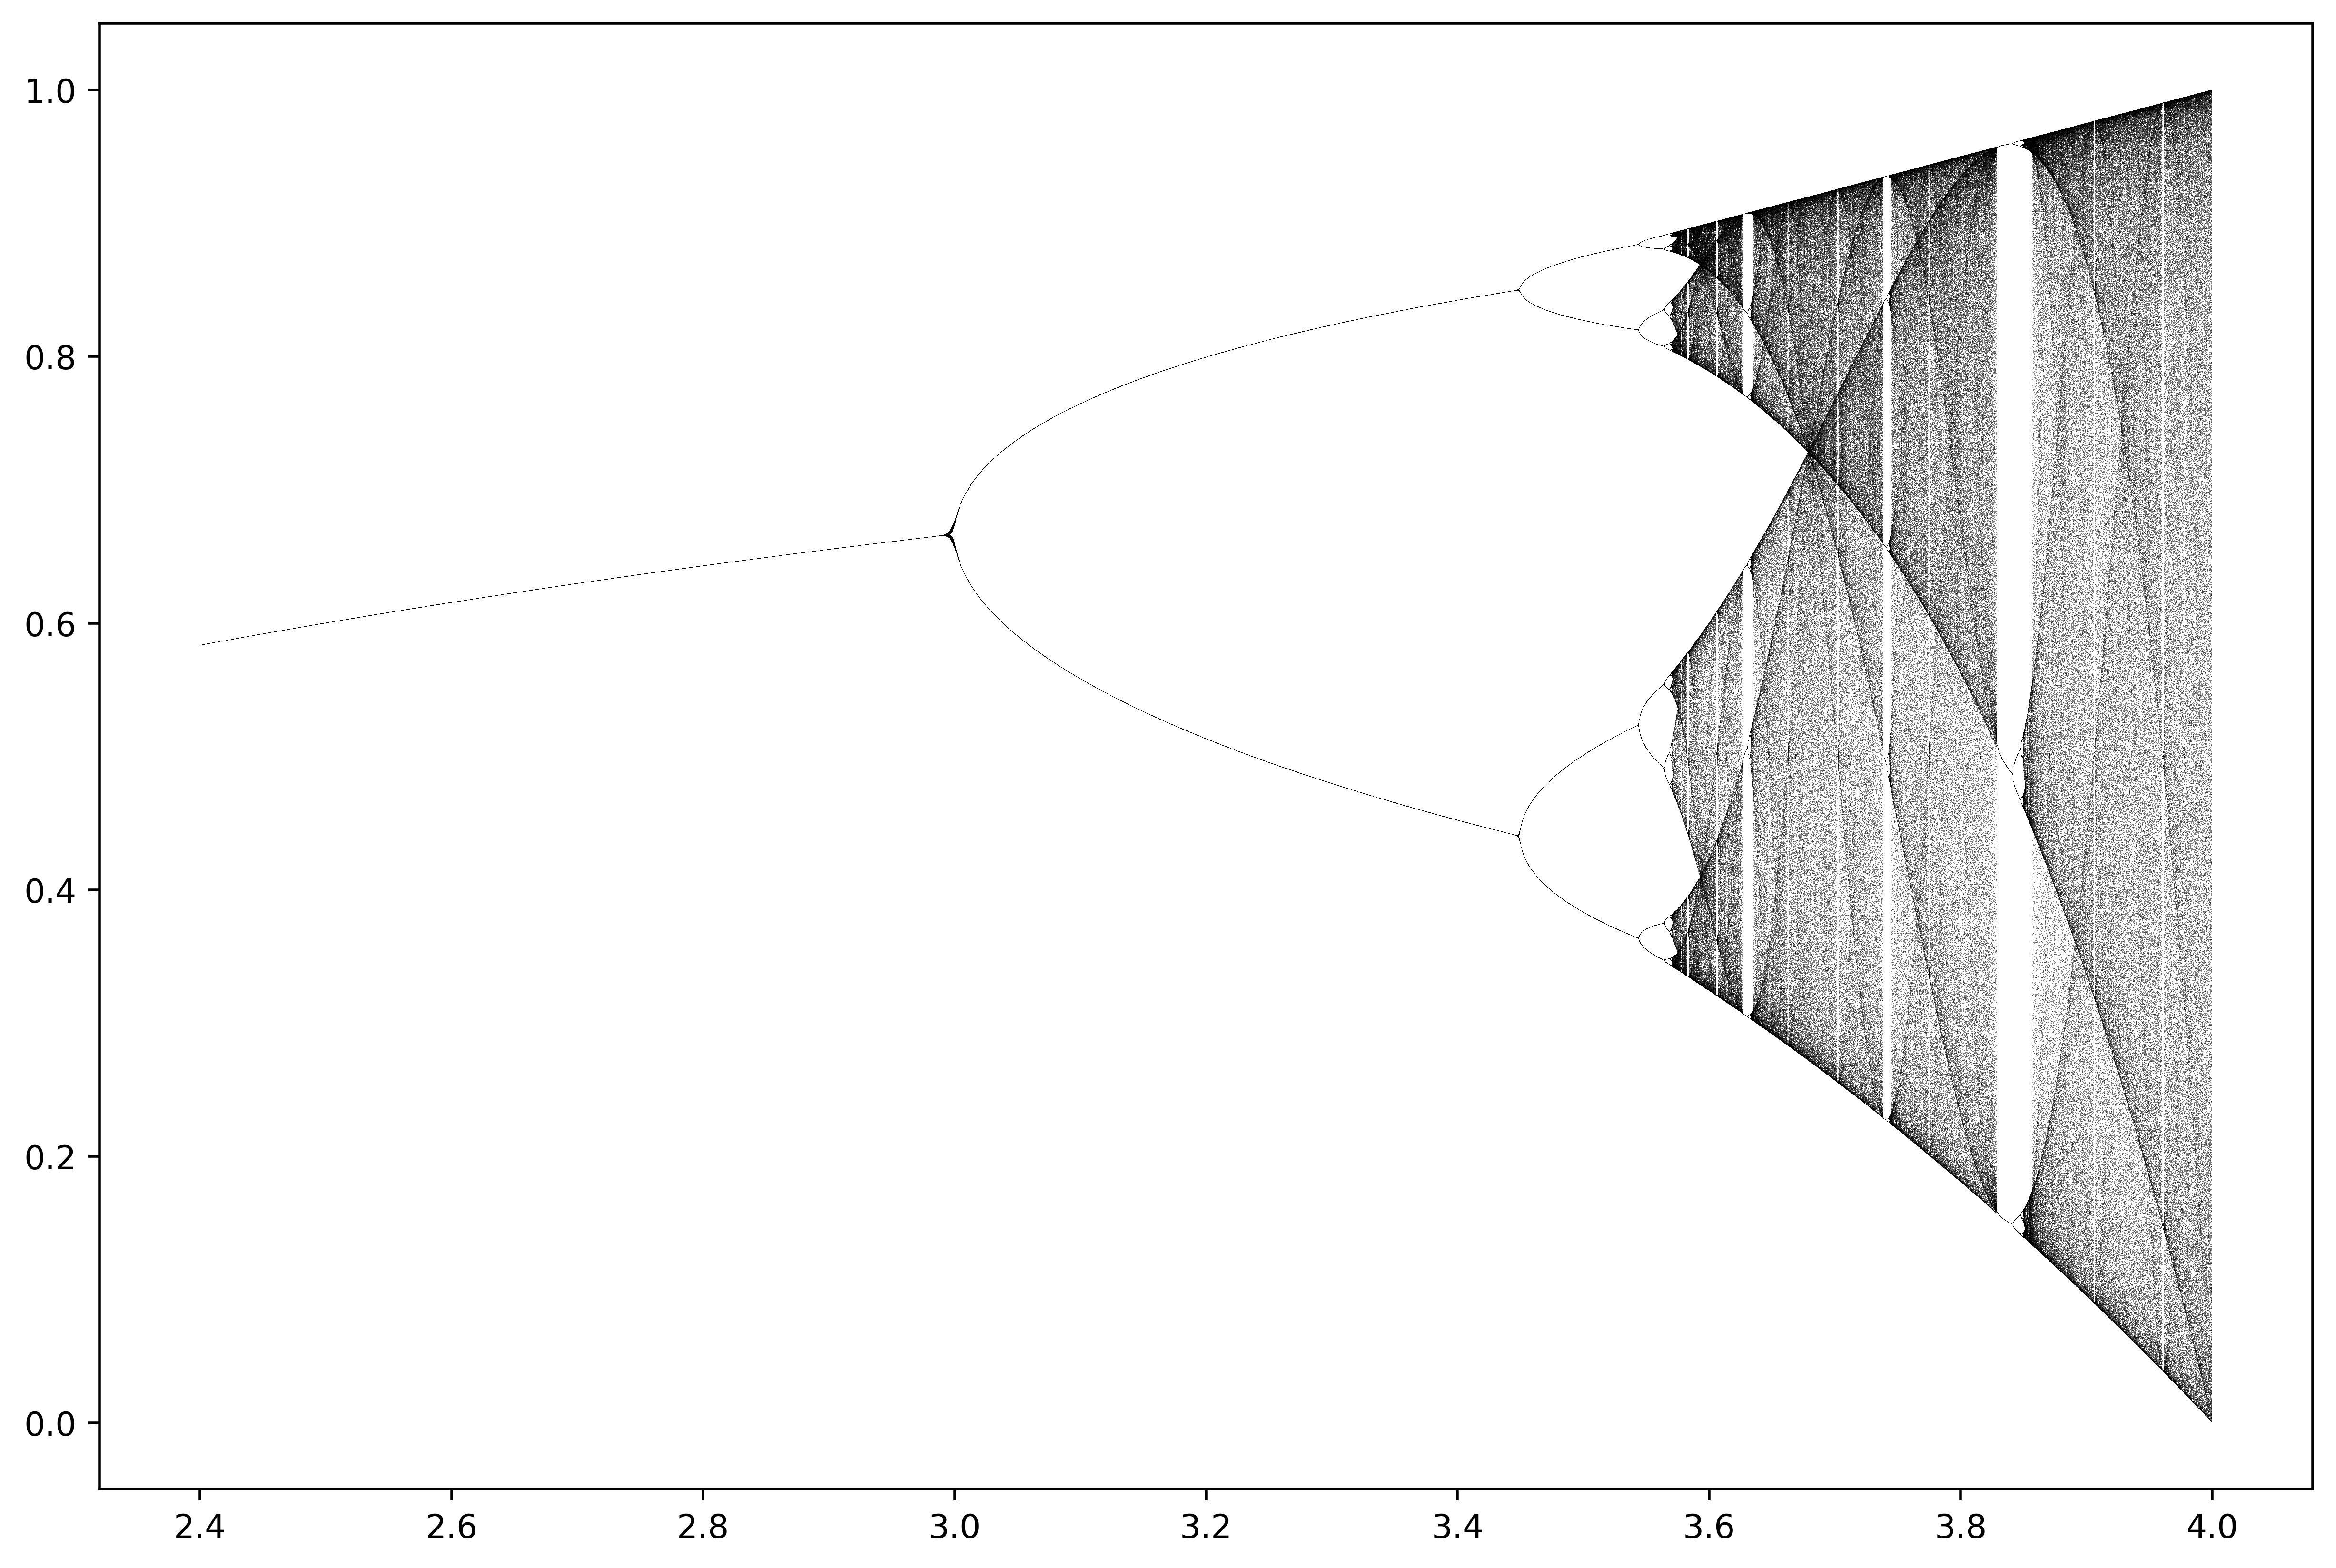

In [16]:
bifurcation_diagram(iterator=logistic_iterator)

### Question 2

| Bifurcation # | Cycle Length | Approximate \( r \) Value |
|---------------|---------------|-----------------------------|
| 1st           | 2             | 3.000000                    |
| 2nd           | 4             | 3.449489                    |
| 3rd           | 8             | 3.544090                    |
| 4th           | 16            | 3.564407                    |
| 5th           | 32            | 3.568759                    |
| 6th           | 64            | 3.569692                    |
| 7th           | 128           | 3.569891                    |
| 8th           | 256           | 3.569934                    |
| 9th           | 512           | 3.569943                    |
| 10th          | 1024          | 3.569945                    |

In [39]:
from scipy.spatial.distance import pdist, squareform

delta = 4.6692 #feigenbaum constant
initial_stepsize = 1e-3
initial_k = 10000
initial_tolerance = 1e-8
repeats_needed = 3


def count_distinct_orbit_points(xs, tol=1e-8):
    # Cluster points that are numerically close
    xs = np.array(list(xs))
    dists = squareform(pdist(xs[:, None]))
    clusters = []
    used = set()

    for i in range(len(xs)):
        if i in used:
            continue
        cluster = {i}
        for j in range(i + 1, len(xs)):
            if dists[i, j] < tol:
                cluster.add(j)
        used.update(cluster)
        clusters.append(cluster)
    return len(clusters)

    
def orbit_length(r, iterator=logistic_iterator, x0=0.2, n=1100, k=1000, tol=1e-8): 
    xs = iterate_map(x0, r, n, iterator=logistic_iterator)[k:]
    return count_distinct_orbit_points(xs, tol=tol)


def find_nth_bifurcation(N, iterator=logistic_iterator, x0=0.2, r_min=2.9, r_max=3.6):
    cycle_length = 2**N
    r_step = initial_stepsize * (1/delta)**(N-1)
    k = initial_k * 2**(N-1)
    tol = initial_tolerance * (1/delta)**N
    
    n = k + repeats_needed * cycle_length
    rs = np.arange(r_min, r_max, r_step)
    for r in rs: 
        orbit_period = orbit_length(r, iterator=iterator, x0=x0, n=n, k=k, tol=tol)
        if orbit_period == cycle_length:
            return r
    print(f"Warning: Bifurcation for N={N} not found in given range.")

[np.float64(3.000999999999989),
 np.float64(3.449209286387388),
 np.float64(3.5441571925172735),
 np.float64(3.5643938970047753),
 np.float64(3.568761643679407),
 np.float64(3.5696921250266302),
 np.float64(3.5698914057057287),
 np.float64(3.5699338581895237)]

## Question 3.)

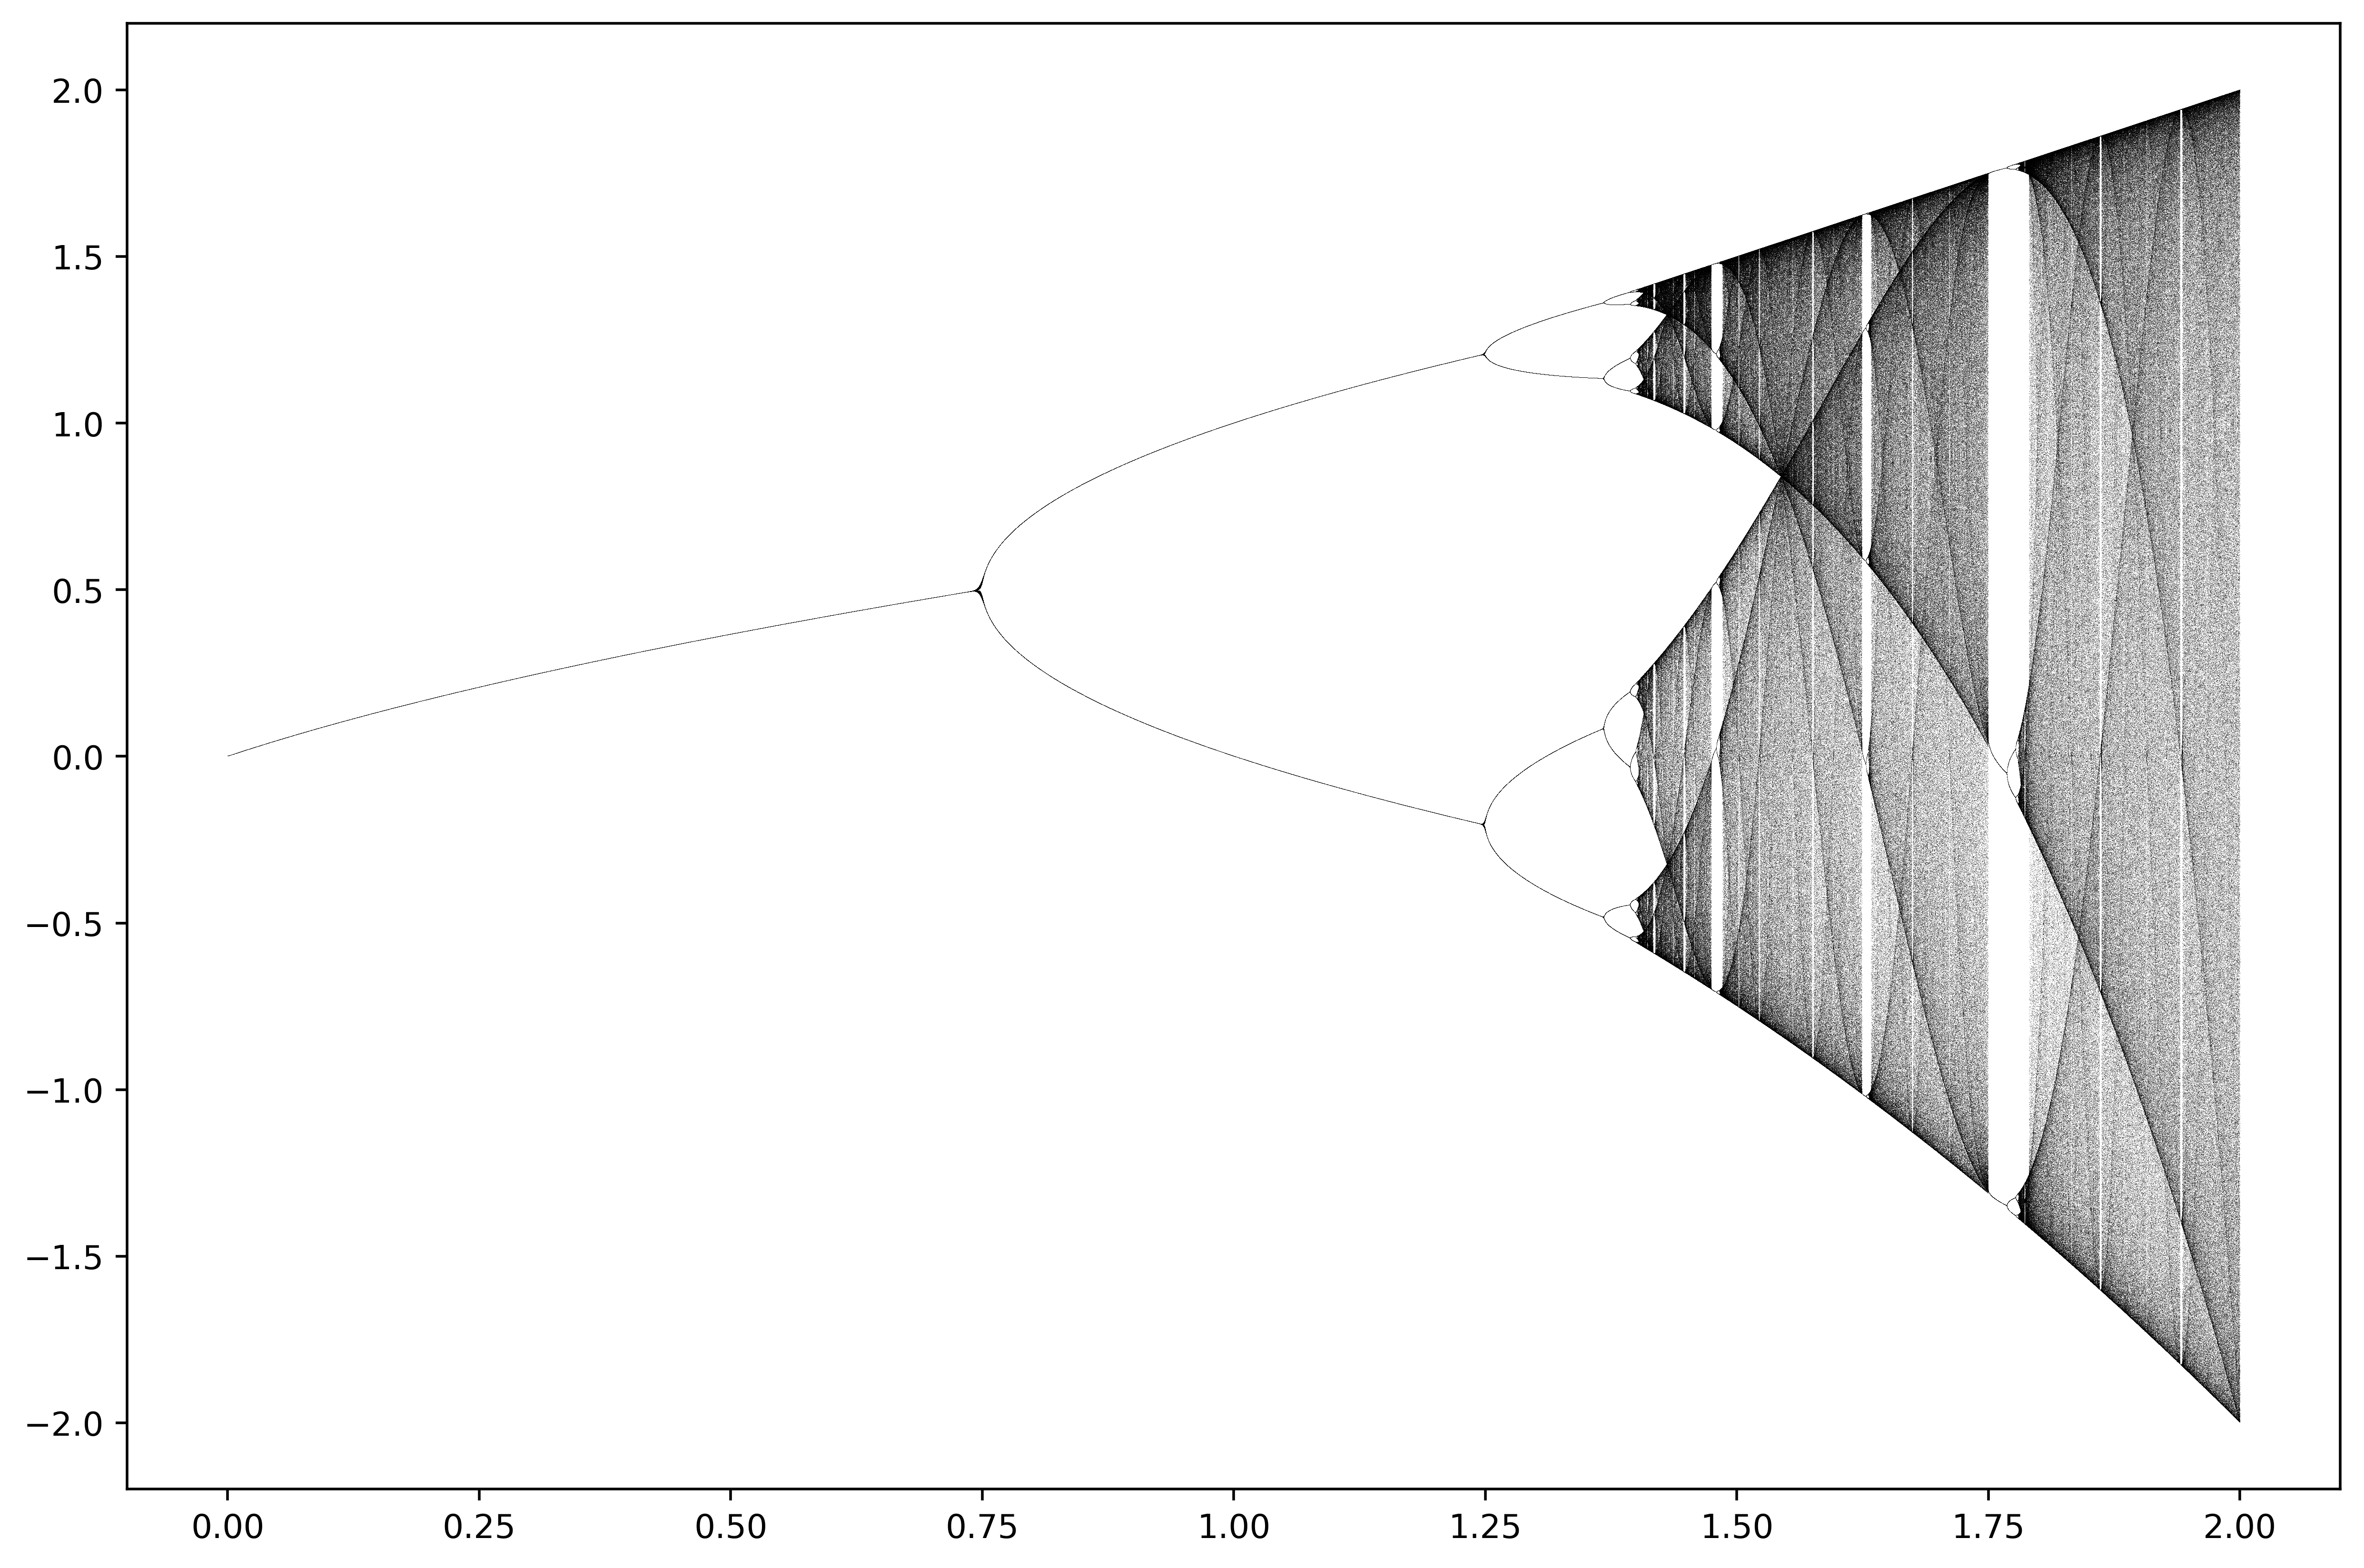

In [40]:
def new_map_iterator(x, r): 
    return r-x**2

bifurcation_diagram(iterator=new_map_iterator, r_min=0, r_max=2, r_step=1e-4, x0=0)

In [41]:
bifurcations = []
for i in range(1, 3):
    if i == 1:
        r_min = 0
    elif i == 2: 
        r_min = 0.5
    else:
        r_min = bifurcations[-1]

    bi = find_nth_bifurcation(i, r_min=r_min, x0=0, iterator=new_map_iterator)
    print(f"b{i}: {bi}")
    bifurcations.append(bi)

b1: 3.001
b2: 0.9996573288785311
